# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [2]:
# read the iris data into a pandas DataFrame, including column names
df = pd.read_csv('iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Task 2

In [4]:
# gather basic information

In [5]:
df.shape

(150, 5)

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Task 3

In [11]:
# use groupby to look for differences between the species
df.groupby("species").sepal_length.mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

In [12]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [13]:
df.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [14]:
# use sorting to look for differences between the species
df.sort_values("sepal_length").values

array([[4.3, 3.0, 1.1, 0.1, 'setosa'],
       [4.4, 3.2, 1.3, 0.2, 'setosa'],
       [4.4, 3.0, 1.3, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.5, 2.3, 1.3, 0.3, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [4.6, 3.2, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.7, 3.2, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.8, 3.0, 1.4, 0.3, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.1, 1.6, 0.2, 'setosa'],
       [4.9, 2.4, 3.3, 1.0, 'versicolor'],
       [4.9, 2.5, 4.5, 1.7, 'virginica'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [5.0, 3.5, 1.3, 0.3, 'setosa'],
       [5.0, 3.4, 1.6, 0.4, 'setosa'],
       [5.0, 3.3, 1.4, 0.2, 'setosa'],
       [5.0, 3.2, 

In [15]:
df.sort_values("sepal_width").values

array([[5.0, 2.0, 3.5, 1.0, 'versicolor'],
       [6.0, 2.2, 4.0, 1.0, 'versicolor'],
       [6.0, 2.2, 5.0, 1.5, 'virginica'],
       [6.2, 2.2, 4.5, 1.5, 'versicolor'],
       [4.5, 2.3, 1.3, 0.3, 'setosa'],
       [5.5, 2.3, 4.0, 1.3, 'versicolor'],
       [5.0, 2.3, 3.3, 1.0, 'versicolor'],
       [6.3, 2.3, 4.4, 1.3, 'versicolor'],
       [5.5, 2.4, 3.7, 1.0, 'versicolor'],
       [5.5, 2.4, 3.8, 1.1, 'versicolor'],
       [4.9, 2.4, 3.3, 1.0, 'versicolor'],
       [6.3, 2.5, 4.9, 1.5, 'versicolor'],
       [6.3, 2.5, 5.0, 1.9, 'virginica'],
       [5.1, 2.5, 3.0, 1.1, 'versicolor'],
       [5.7, 2.5, 5.0, 2.0, 'virginica'],
       [6.7, 2.5, 5.8, 1.8, 'virginica'],
       [5.6, 2.5, 3.9, 1.1, 'versicolor'],
       [5.5, 2.5, 4.0, 1.3, 'versicolor'],
       [4.9, 2.5, 4.5, 1.7, 'virginica'],
       [5.8, 2.6, 4.0, 1.2, 'versicolor'],
       [5.7, 2.6, 3.5, 1.0, 'versicolor'],
       [5.5, 2.6, 4.4, 1.2, 'versicolor'],
       [7.7, 2.6, 6.9, 2.3, 'virginica'],
       [6.1, 2.6, 5.6

array([[<AxesSubplot:title={'center':'setosa'}>,
        <AxesSubplot:title={'center':'versicolor'}>],
       [<AxesSubplot:title={'center':'virginica'}>, <AxesSubplot:>]],
      dtype=object)

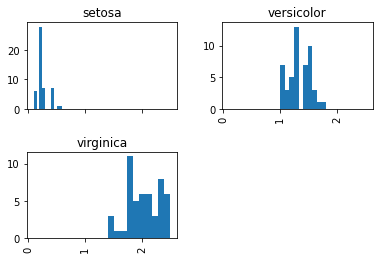

In [16]:
# use plotting to look for differences between the species
df.petal_width.hist(by=df.species, sharex=True)

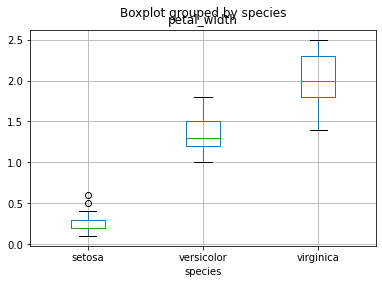

In [17]:
df.boxplot(column='petal_width', by='species');

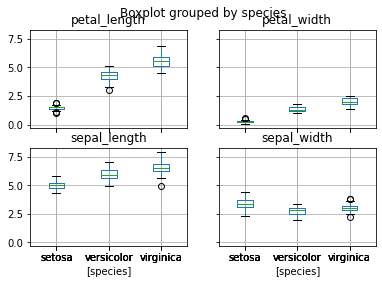

In [18]:
df.boxplot(by='species');

In [19]:
# map species to a numeric value so that plots can be colored by category
df['species_num'] = df.species.factorize()[0]

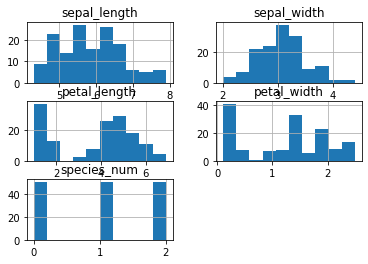

In [20]:
df.hist();

## Task 4

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
86,6.7,3.1,4.7,1.5,versicolor,1,7.05
85,6.0,3.4,4.5,1.6,versicolor,1,7.20
52,6.9,3.1,4.9,1.5,versicolor,1,7.35
72,6.3,2.5,4.9,1.5,versicolor,1,7.35
119,6.0,2.2,5.0,1.5,virginica,2,7.50
56,6.3,3.3,4.7,1.6,versicolor,1,7.52
106,4.9,2.5,4.5,1.7,virginica,2,7.65
133,6.3,2.8,5.1,1.5,virginica,2,7.65
134,6.1,2.6,5.6,1.4,virginica,2,7.84
83,6.0,2.7,5.1,1.6,versicolor,1,8.16


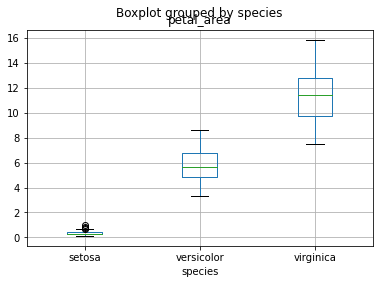

In [21]:
df["petal_area"] = df.petal_length * df.petal_width
df.groupby("species").petal_area.describe().unstack()
df.boxplot(column="petal_area", by="species")
df[(df.petal_area > 7) & (df.petal_area < 9)].sort_values('petal_area')

## Bonus

In [22]:
# define function that accepts a row of data and returns a predicted species
def classify_df(row):
    petal_area = (row[2] * row[3])
    
    if petal_area < 2:
        prediction = "setosa"
    elif petal_area < 7.5: 
        prediction = "versicolor"
    else: 
        prediction = "virginica"
        
    factorize = {'setosa':0, 'versicolor':1, 'virginica':2}
    return factorize[prediction]

In [23]:
predictions = [classify_df(row) for index, row in df.iterrows()]

In [24]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [25]:
np.mean(df.species_num == predictions)

0.9733333333333334

In [26]:
sum(df.species_num == predictions) / len(predictions)

0.9733333333333334